##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [1]:
!pip install tensorflow



In [2]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [3]:
!pip install matplotlib


In [4]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os, random
from tensorflow import keras
from tensorflow.keras import layers

# to make the run consistent 
SEED = 42

os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


# Number of unique classes
print("Number of classes:", len(np.unique(y_train)))


Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)
Number of classes: 10


In [5]:
# Define class names
class_names = [ "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"]

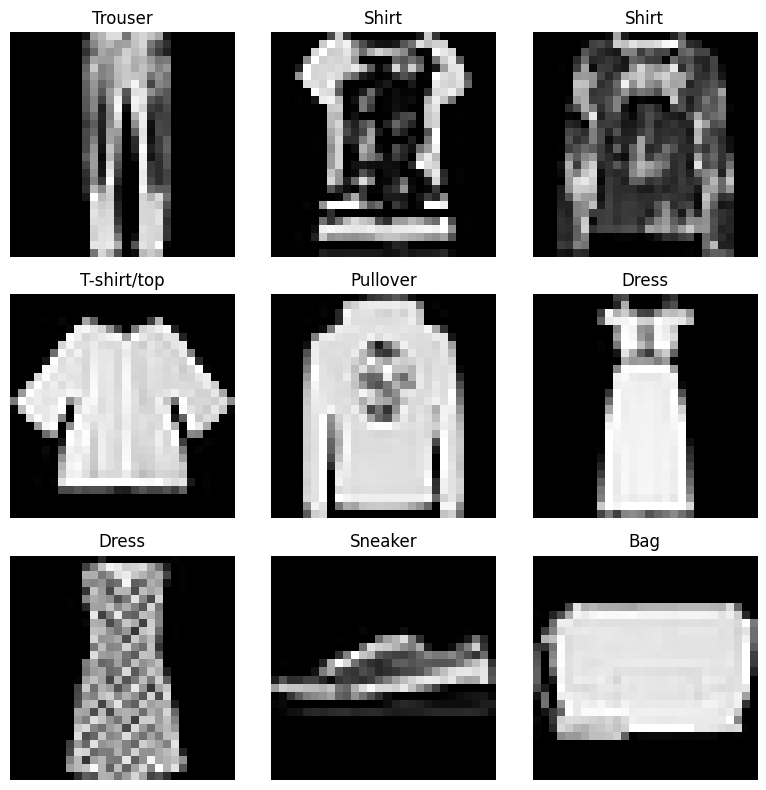

In [6]:
# Plot a 3x3 grid of random images from the dataset with their labels

plt.figure(figsize=(8,8))

for i in range(9):
    plt.subplot(3,3,i+1)   
    random_index = np.random.randint(0, len(x_train))
    plt.imshow(x_train[random_index], cmap="gray")
    plt.title(class_names[y_train[random_index]])
    plt.axis("off")

plt.tight_layout()
plt.show()

T-shirt/top : 6000
Trouser : 6000
Pullover : 6000
Dress : 6000
Coat : 6000
Sandal : 6000
Shirt : 6000
Sneaker : 6000
Bag : 6000
Ankle boot : 6000


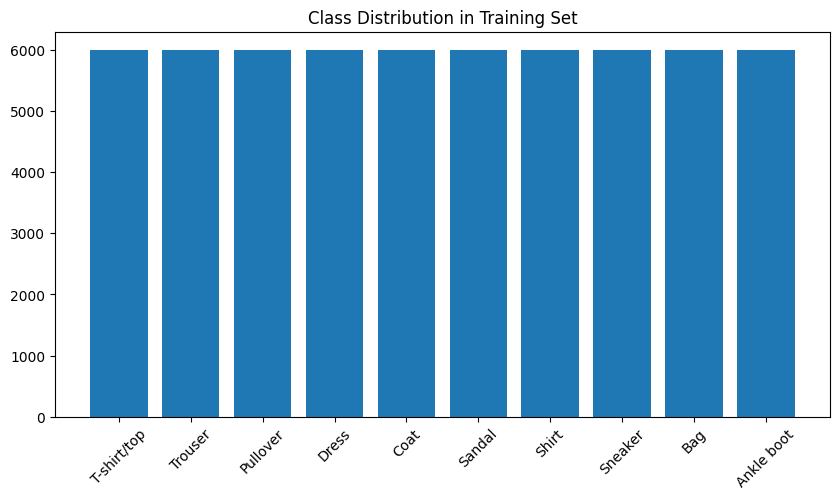

In [7]:
# Count occurrences of each class in the training set
unique, counts = np.unique(y_train, return_counts=True)

for i in range(len(unique)):
    print(class_names[i], ":", counts[i])

# Plot the class distribution
plt.figure(figsize=(10,5))
plt.bar(class_names, counts)
plt.xticks(rotation=45)
plt.title("Class Distribution in Training Set")
plt.show()

### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [8]:
# Import libraries (import above)

# Normalize pixel values for x_train and x_test 
# From 0-255 to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to add channel dimension (28,28) → (28,28,1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print("New shape:", x_train.shape)
# One-hot encode the labels (do not use it)

# Build a CNN model
model = keras.Sequential([
    layers.Input(shape=(28,28,1)),

    layers.Conv2D(32, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.4),

    layers.Dense(10, activation="softmax")
])

model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=3,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=2,
        verbose=1
    )
]

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_acc)


New shape: (60000, 28, 28, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,538 (1.61 MB)

 Trainable params: 422,090 (1.61 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - accuracy: 0.8295 - loss: 0.4855 - val_accuracy: 0.8868 - val_loss: 0.3058 - learning_rate: 0.0010
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.8772 - loss: 0.3420 - val_accuracy: 0.8883 - val_loss: 0.2981 - learning_rate: 0.0010
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.8894 - loss: 0.3047 - val_accuracy: 0.9093 - val_loss: 0.2475 - learning_rate: 0.0010
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.8971 - loss: 0.2835 - val_accuracy: 0.9108 - val_loss: 0.2326 - learning_rate: 0.0010
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.9030 - loss: 0.2645 - val_accuracy: 0.9108 - val_loss: 0.2352 - learning_rate: 0.0010
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.9061 - loss: 0.2505 - val_accuracy: 0.9148 - val_loss: 0.2251 - learning_rate: 0.0010
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 35s 42ms/step - accuracy: 0.9110 - l